# Exercise 1

- **Load the Dataset**
	Load the dataset contained in the file `faces.mat` using the following commands:
	```python
	import scipy.io as sio
	data = sio.loadmat('faces.mat')
	X = data['X']
	```

- **Dataset Description**
	The dataset contains a collection of 5000 32 × 32 grayscale face images. You can plot a single face as follows:
	```python
	import numpy as np
	import matplotlib.pyplot as plt
	x0 = np.transpose(np.reshape(X[0, :], (32, 32)))
	plt.imshow(x0, cmap='gray')
	```

- **Tasks**
	1. Compute the normalized matrix $ \tilde{X} $.
	2. Perform PCA on $ \tilde{X} $ and plot the first 25 eigenfaces.
	3. Reduce the dimension of the sample from 1024 (32 by 32) to 100 by projecting the matrix $ \tilde{X} $ onto $ U $.
	4. Plot the original images (pick the first 100 images) and the ones reconstructed from only the first 100 principal components. Plot also the error.


In [1]:
import scipy.io as sio
data = sio.loadmat('faces.mat')
X = data['X']

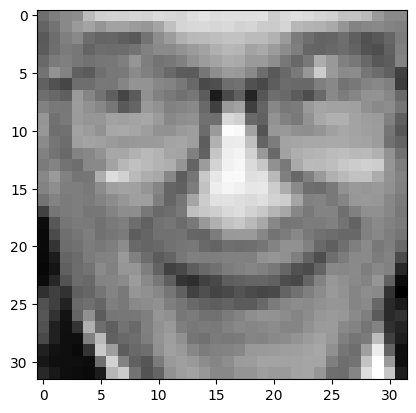

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x0 = np.transpose(np.reshape(X[0,:],(32,32)))
plt.imshow(x0,cmap='gray')
plt.show()

1. Compute the normalized matrix $ \tilde{X} $.


X has 5000 samples and 1024 rows


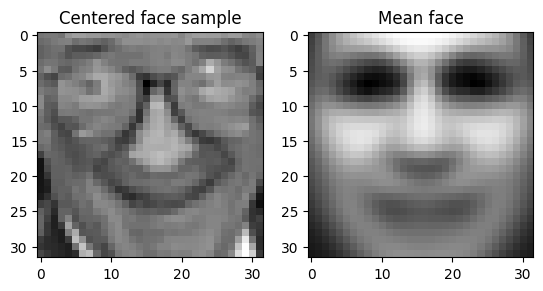

In [3]:
print(f"X has {X.shape[0]} samples and {X.shape[1]} rows")

X_mean = np.mean(X, axis=0)

X_centered = X - X_mean[None, :]


fig, ax = plt.subplots(1, 2)
x0_centered = np.transpose(np.reshape(X_centered[0,:],(32,32)))
ax[0].imshow(x0_centered,cmap='gray') #plot the first centered face
ax[0].set_title('Centered face sample')

x_mean = np.transpose(np.reshape(X_mean[:],(32,32)))
ax[1].imshow(x_mean,cmap='gray') #plot the mean face
ax[1].set_title('Mean face')

plt.show()


2. Perform PCA on $ \tilde{X} $ and plot the first 25 eigenfaces.


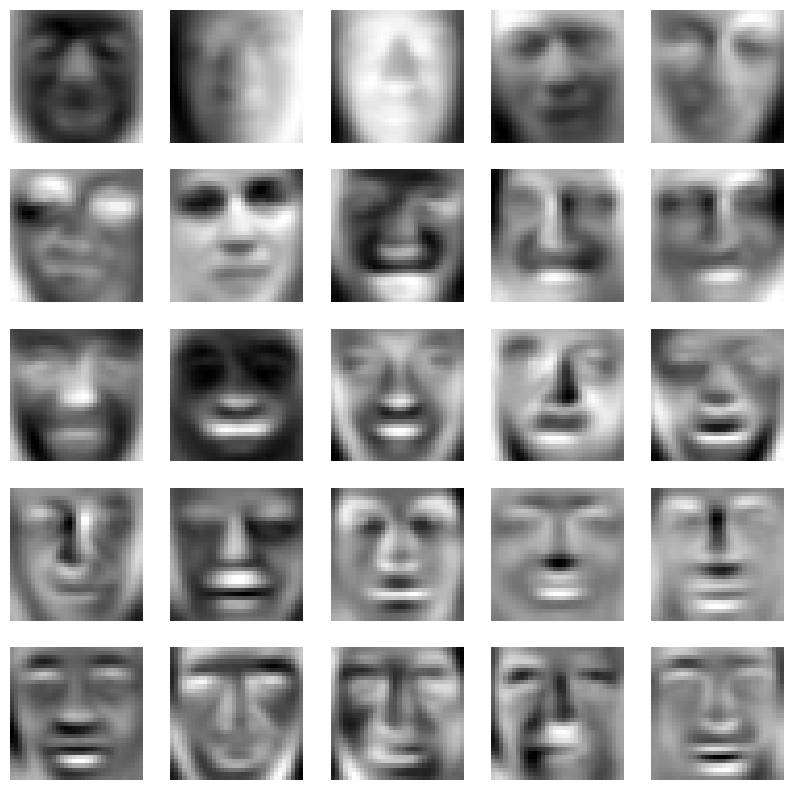

In [4]:
# Note: I use full_matrices=false to speedup computation using the economy SVD
#       I use X_centered.T for convention with labs, but it it not necessary (But it inverts the roles of V and U)
X_pca = X_centered.T
U, s, Vt = np.linalg.svd(X_centered.T, full_matrices=False)

# Plot the first 25 principal directions (columns of U)
fig, ax = plt.subplots(5, 5, figsize=(10, 10))
for i in range(5):
	for j in range(5):
		ax[i, j].imshow(np.reshape(U[:, i*5+j], (32, 32)).T, cmap='gray')
		ax[i, j].axis('off')
plt.show()

3. Reduce the dimension of the sample from 1024 (32 by 32) to 100 by projecting the matrix $ \tilde{X} $ onto $ U $.


Text(0.5, 1.0, 'Reduced repr. of face 2')

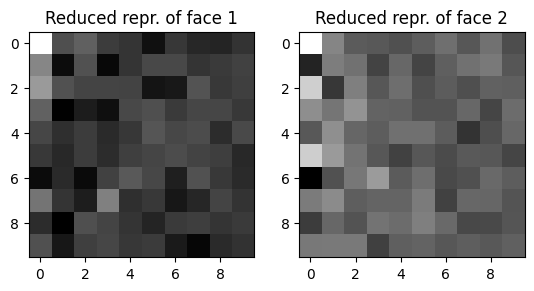

In [5]:
# Reconstruct the faces using only the first 100 principal directions
X_reduced = np.dot(X_centered, U[:, :100])

# Show two examples of reduced representation
# Note that is improper to use images for this hidden representation
fig, ax = plt.subplots(1, 2)
ax[0].imshow(np.reshape(X_reduced[0, :], (10, 10)).T, cmap='gray')
ax[0].set_title('Reduced repr. of face 1')
ax[1].imshow(np.reshape(X_reduced[1, :], (10, 10)).T, cmap='gray')
ax[1].set_title('Reduced repr. of face 2')


4. Plot the original images (pick the first 100 images) and the ones reconstructed from only the first 100 principal components. Plot also the error.


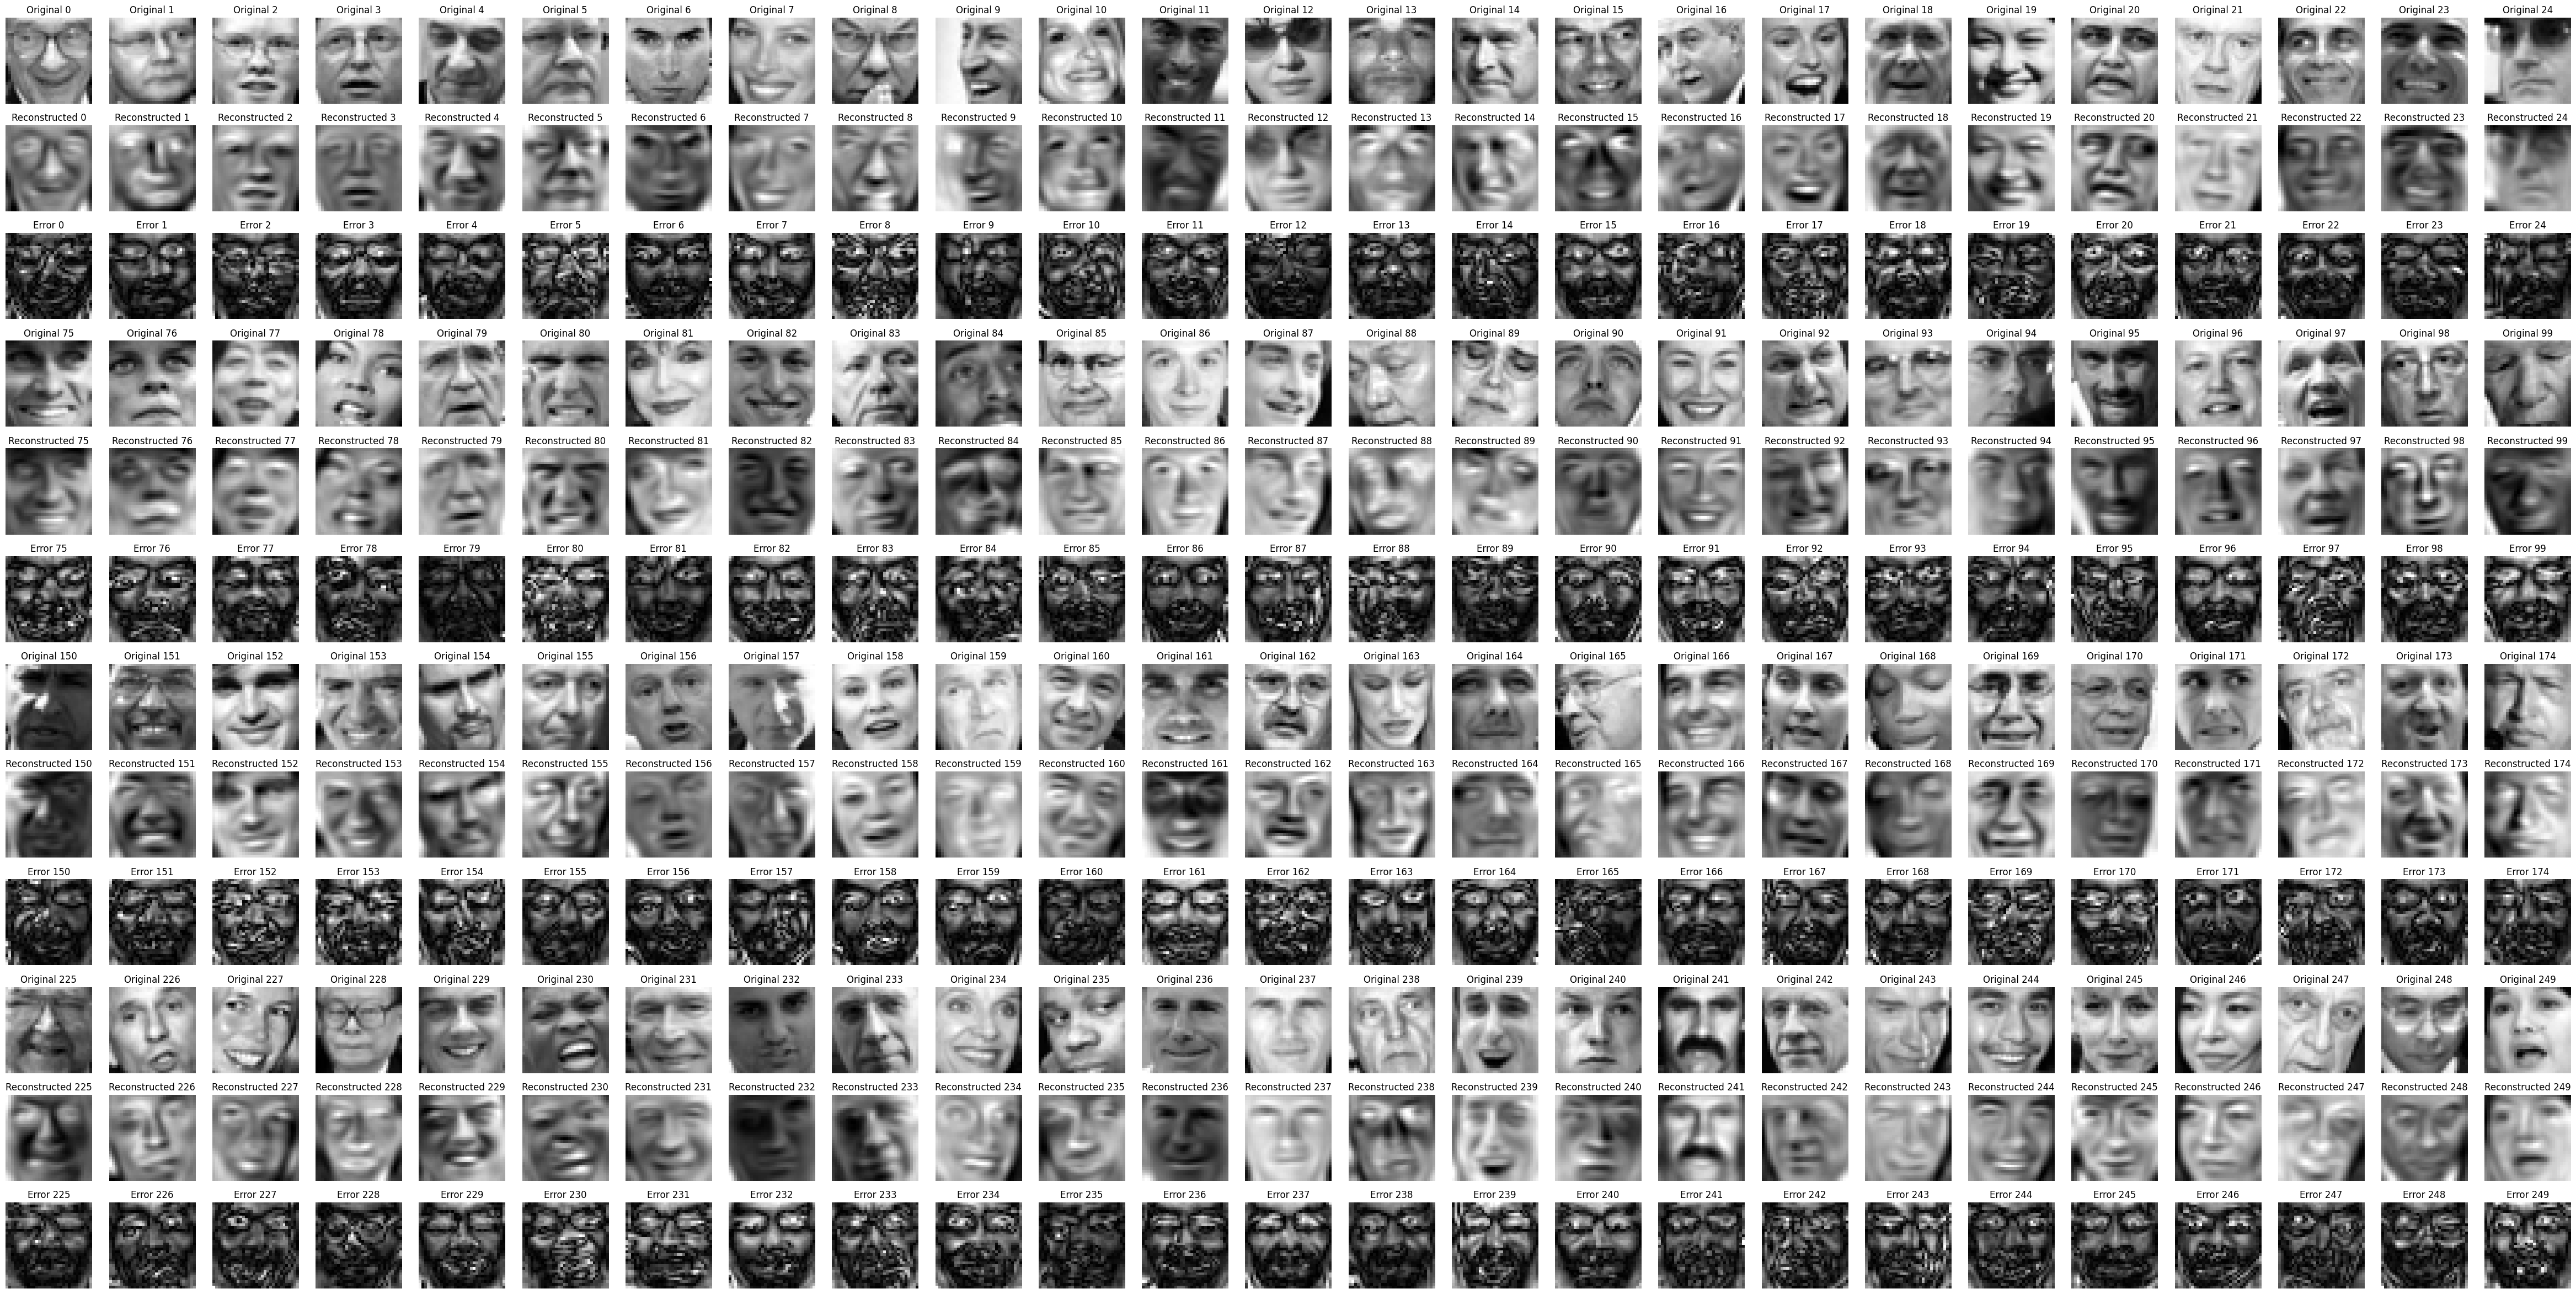

In [6]:
X_reconstructed = np.dot(X_reduced, U[:, :100].T)
X_errors = np.abs(X - X_reconstructed)

fig, axs = plt.subplots(12, 25, figsize=(60, 30))

for i in range(0, 12, 3):
	for j in range(25):
		axs[i, j].axis('off')
		axs[i, j].imshow(np.reshape(X[j + i*25, :], (32, 32)).T, cmap='gray')
		axs[i, j].set_title(f'Original {j + i*25}')
		axs[i+1, j].axis('off')
		axs[i+1, j].imshow(np.reshape(X_reconstructed[j + i*25, :], (32, 32)).T, cmap='gray')
		axs[i+1, j].set_title(f'Reconstructed {j + i*25}')
		axs[i+2, j].axis('off')
		axs[i+2, j].imshow(np.reshape(X_errors[j + i*25, :], (32, 32)).T, cmap='gray')
		axs[i+2, j].set_title(f'Error {j + i*25}')




---


# Exercise 2

Consider the following simple linear network:  
$$ a(\mathbf{v}, \mathbf{w}) = \mathbf{w} \cdot \mathbf{v}, \tag{1} $$  
where $\mathbf{w} = [w, b]^T$ is the parameter vector ($w$ is the weight and $b$ the bias), and $\mathbf{v} = [x, 1]^T$ is the input vector.

We are given the following data samples:  
$(x_1, y_1) = (2, 0.5)$ and $(x_2, y_2) = (-1, 0)$.  

The cost function is defined as:  
$$ J(\mathbf{w}) = (y_1 - a(\mathbf{v}_1, \mathbf{w}))^2 + (y_2 - a(\mathbf{v}_2, \mathbf{w}))^2, \tag{2} $$  
where $\mathbf{v}_1 = [x_1, 1]^T$ and $\mathbf{v}_2 = [x_2, 1]^T$.

#### Tasks:
1. **Rewrite the cost function**:  
   Rewrite equation (2) in the following quadratic form:  
   $$ J(\mathbf{w}) = \frac{1}{2} \mathbf{w}^T \mathbf{A} \mathbf{w} + \mathbf{d}^T \mathbf{w} + c, $$  
   explicitly identifying the matrices $\mathbf{A}$, $\mathbf{d}$, and the scalar $c$.  

2. **Compute the optimal parameter vector**:  
   Determine the exact value of the parameter vector $\mathbf{w}^*$ that minimizes $J(\mathbf{w})$.  

3. **Plot the cost surface**:  
   Generate a 3D plot representing the surface of the cost function $J(\mathbf{w})$.  

4. **Implement gradient descent**:  
   Implement the gradient descent method to compute $\mathbf{w}^*$, using the following settings:  
   - Initial guess: $\mathbf{w}^{(0)} = [1, 1]^T$  
   - Learning rate: $\eta = 0.05$  

5. **Determine the maximum learning rate**:  
   Calculate the maximum value of the learning rate $\eta_{\text{max}}$ that can be used to ensure convergence of the gradient descent algorithm.



---
### Q1:
1. **Rewrite the cost function**:  
   Rewrite equation (2) in the following quadratic form:  
   $$ J(\mathbf{w}) = \frac{1}{2} \mathbf{w}^T \mathbf{A} \mathbf{w} + \mathbf{d}^T \mathbf{w} + c, $$  
   explicitly identifying the matrices $\mathbf{A}$, $\mathbf{d}$, and the scalar $c$. 

### A1: 

1. **Cost Function Definition**:
   The cost function is given as:
   $$
   J(\mathbf{w}) = (y_1 - a(\mathbf{v}_1, \mathbf{w}))^2 + (y_2 - a(\mathbf{v}_2, \mathbf{w}))^2,
   $$
   where $ a(\mathbf{v}, \mathbf{w}) = \mathbf{w} \cdot \mathbf{v} $. Substituting this, we get:
   $$
   J(\mathbf{w}) = (y_1 - \mathbf{w}^T \mathbf{v}_1)^2 + (y_2 - \mathbf{w}^T \mathbf{v}_2)^2.
   $$

2. **Expand the Squares**:
   Expanding each term:
   $$
   (y_i - \mathbf{w}^T \mathbf{v}_i)^2 = y_i^2 - 2y_i (\mathbf{w}^T \mathbf{v}_i) + (\mathbf{w}^T \mathbf{v}_i)^2.
   $$
   Applying this to both terms, we get:
   $$
   J(\mathbf{w}) = y_1^2 - 2y_1 (\mathbf{w}^T \mathbf{v}_1) + (\mathbf{w}^T \mathbf{v}_1)^2 + y_2^2 - 2y_2 (\mathbf{w}^T \mathbf{v}_2) + (\mathbf{w}^T \mathbf{v}_2)^2.
   $$

3. **Combine Terms**:
   Rearrange $ J(\mathbf{w}) $ as:
   $$
   J(\mathbf{w}) = \left[ (\mathbf{w}^T \mathbf{v}_1)^2 + (\mathbf{w}^T \mathbf{v}_2)^2 \right] 
   - 2 \left[ y_1 (\mathbf{w}^T \mathbf{v}_1) + y_2 (\mathbf{w}^T \mathbf{v}_2) \right] 
   + (y_1^2 + y_2^2).
   $$

4. **Matrix Representation**:
   Each term can be rewritten in matrix form:
   - The quadratic term $ (\mathbf{w}^T \mathbf{v}_i)^2 $ expands as $ \mathbf{w}^T (\mathbf{v}_i \mathbf{v}_i^T) \mathbf{w} $.
   - The linear term $ -2 y_i (\mathbf{w}^T \mathbf{v}_i) $ becomes $ -2 y_i \mathbf{v}_i^T \mathbf{w} $.
   - The constant $ y_1^2 + y_2^2 $ remains unchanged.

   Summing over both samples, we get:
   $$
   J(\mathbf{w}) = \mathbf{w}^T \left( \mathbf{v}_1 \mathbf{v}_1^T + \mathbf{v}_2 \mathbf{v}_2^T \right) \mathbf{w} 
   - 2 \mathbf{w}^T \left( y_1 \mathbf{v}_1 + y_2 \mathbf{v}_2 \right) + \left( y_1^2 + y_2^2 \right).
   $$

5. **Identify $\mathbf{A}$, $\mathbf{d}$, and $c$**:
   Comparing with the quadratic form, we identify:
   $$
   \mathbf{A} = 2 \left( \mathbf{v}_1 \mathbf{v}_1^T + \mathbf{v}_2 \mathbf{v}_2^T \right),
   $$
   $$
   \mathbf{d} = -2 \left( y_1 \mathbf{v}_1 + y_2 \mathbf{v}_2 \right),
   $$
   $$
   c = y_1^2 + y_2^2.
   $$


**In our case:**   
Substituting $\mathbf{v}_1 = [2, 1]^T$ and $\mathbf{v}_2 = [-1, 1]^T$:
   - $\mathbf{v}_1 \mathbf{v}_1^T = \begin{bmatrix} 4 & 2 \\ 2 & 1 \end{bmatrix}$,
   - $\mathbf{v}_2 \mathbf{v}_2^T = \begin{bmatrix} 1 & -1 \\ -1 & 1 \end{bmatrix}$,
   - $\mathbf{v}_1 \mathbf{v}_1^T + \mathbf{v}_2 \mathbf{v}_2^T = \begin{bmatrix} 5 & 1 \\ 1 & 2 \end{bmatrix}$,
   - $\mathbf{A} = 2 \begin{bmatrix} 5 & 1 \\ 1 & 2 \end{bmatrix} = \begin{bmatrix} 10 & 2 \\ 2 & 4 \end{bmatrix}$,
   - $\mathbf{d} = -2 \left( 0.5 \begin{bmatrix} 2 \\ 1 \end{bmatrix} + 0 \begin{bmatrix} -1 \\ 1 \end{bmatrix} \right) = -2 \begin{bmatrix} 1 \\ 0.5 \end{bmatrix} = \begin{bmatrix} -2 \\ -1 \end{bmatrix}$,
   - $c = 0.5^2 + 0^2 = 0.25$.

so:
$$
\mathbf{A} = \begin{bmatrix} 10 & 2 \\ 2 & 4 \end{bmatrix}, \quad \mathbf{d} = \begin{bmatrix} -2 \\ -1 \end{bmatrix}, \quad c = 0.25.
$$

#### Note:
correctness is checked in the following cell

In [7]:
def J(w, v1, v2, y1, y2):
	A = 2 * (np.outer(v1, v1) + np.outer(v2, v2))
	d = -2 * (y1 * v1 + y2 * v2)
	c = y1**2 + y2**2
	print(f"A = {A}")
	print(f"d = {d}")
	print(f"c = {c}")
	return 0.5 * np.dot(w.T, np.dot(A, w)) + np.dot(d.T, w) + c

def J_original(w, v1, v2, y1, y2):
	return (y1 - np.dot(w.T, v1))**2 + (y2 - np.dot(w.T, v2))**2

w = np.random.randn(2)
v1 = np.array([2., 1.])
v2 = np.array([-1., 1.])
y1 = 0.5
y2 = 0.

print(f"J(w) = {J(w, v1, v2, y1, y2)}")
print(f"J_original(w) = {J_original(w, v1, v2, y1, y2)}")	

A = [[10.  2.]
 [ 2.  4.]]
d = [-2. -1.]
c = 0.25
J(w) = 7.399258834873817
J_original(w) = 7.399258834873816


### Q2:
2. **Compute the optimal parameter vector**:  
   Determine the exact value of the parameter vector $\mathbf{w}^*$ that minimizes $J(\mathbf{w})$.  

### A2:

Given that the cost function as we have redefined it is a quadratic function we know that the derivative can be written as:

$$
\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} = \mathbf{A} \mathbf{w} + \mathbf{d}.
$$

And in our particular case we have:

$$
\mathbf{A} = \begin{bmatrix} 10 & 2 \\ 2 & 4 \end{bmatrix}, \quad \mathbf{d} = \begin{bmatrix} -2 \\ -1 \end{bmatrix}.
$$

So by setting the derivative to zero we can find the critical points:

$$
\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} = \mathbf{A} \mathbf{w} + \mathbf{d} = \begin{bmatrix} 0\\0 \end{bmatrix}
\\
\begin{bmatrix} 10 & 2 \\ 2 & 4 \end{bmatrix} \begin{bmatrix} w_1 \\ w_2 \end{bmatrix} + \begin{bmatrix} -2 \\ -1 \end{bmatrix} = \begin{bmatrix} 0\\0 \end{bmatrix}
$$
so we get the system:
$$
10w_1 + 2w_2 - 2 = 0 \ and \quad 2w_1 + 4w_2 - 1 = 0.

$$

Solving the system of equations we get:
$$
w_1 = \frac{1}{6}, \quad w_2 = \frac{1}{6}.
$$

Furthermore given that J is a quadratic function we know that all its critical points are global minima. So $w_1 = \frac{1}{6}, \quad w_2 = \frac{1}{6}$ is the optimal parameter vector that minimizes $J(\mathbf{w})$.

#### Note:
following code to check correctness

In [8]:
import jax.numpy as jnp
import jax

def J_jax(w, v1, v2, y1, y2):
	A = 2 * (jnp.outer(v1, v1) + jnp.outer(v2, v2))
	d = -2 * (y1 * v1 + y2 * v2)
	c = y1**2 + y2**2
	return 0.5 * jnp.dot(w.T, jnp.dot(A, w)) + jnp.dot(d.T, w) + c

gradJ = jax.jit(jax.grad(J_jax, argnums=0))

w_star = jnp.array([1/6, 1/6])

print(f"J(w_star) = {J_jax(w_star, v1, v2, y1, y2)}")
print(f"gradJ(w_star) = {gradJ(w_star, v1, v2, y1, y2)}")


J(w_star) = 0.0
gradJ(w_star) = [4.4703484e-08 2.9802322e-08]


### Q:

3. **Plot the cost surface**:  
   Generate a 3D plot representing the surface of the cost function $J(\mathbf{w})$. 

### A: 


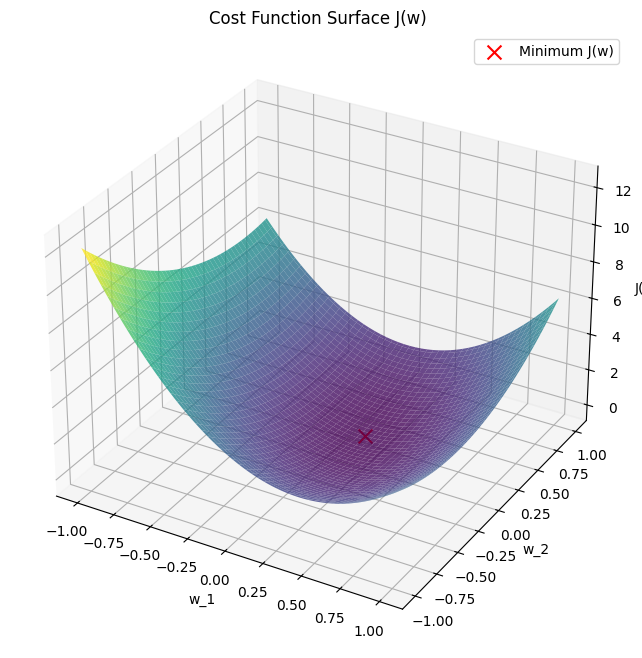

In [9]:
import numpy as np

import matplotlib.pyplot as plt

def J(w, v1, v2, y1, y2):
	A = 2 * (np.outer(v1, v1) + np.outer(v2, v2))
	d = -2 * (y1 * v1 + y2 * v2)
	c = y1**2 + y2**2
	return 0.5 * np.dot(w.T, np.dot(A, w)) + np.dot(d.T, w) + c


# Create a grid of values for w1 and w2
w1 = np.linspace(-1, 1, 100)
w2 = np.linspace(-1, 1, 100)
W1, W2 = np.meshgrid(w1, w2)

# Compute the cost function values for each point in the grid
J_values = np.array([[J(np.array([w1, w2]), v1, v2, y1, y2) for w1 in w1] for w2 in w2])

# Plot the cost surface in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1, W2, J_values, cmap='viridis', alpha=0.8)

# Add 1/6, 1/6, J(1/6, 1/6) to the plot as the minimum
ax.scatter(1/6, 1/6, J(np.array([1/6, 1/6]), v1, v2, y1, y2), color='r', s=100, label='Minimum J(w)', marker='x')
ax.legend()

ax.set_xlabel('w_1')
ax.set_ylabel('w_2')
ax.set_zlabel('J(w)')
ax.set_title('Cost Function Surface J(w)')
plt.show()

### Q:

4. **Implement gradient descent**:  
   Implement the gradient descent method to compute $\mathbf{w}^*$, using the following settings:  
   - Initial guess: $\mathbf{w}^{(0)} = [1, 1]^T$  
   - Learning rate: $\eta = 0.05$  

### A:

In [10]:
def GD(w, v1, v2, y1, y2, alpha, n_iter):
	for i in range(n_iter):
		w = w - alpha * gradJ(w, v1, v2, y1, y2)
	return w

w_init = np.array([1., 1.])
alpha = 0.05
n_iter = 1000

w_opt = GD(w_init, v1, v2, y1, y2, alpha, n_iter)

print(f"Optimal w = {w_opt}")
print(f"J(w_opt) = {J(w_opt, v1, v2, y1, y2)}") # Close to zero up to numerical precision

Optimal w = [0.16666666 0.1666667 ]
J(w_opt) = 2.220446049250313e-15


### Q:

5. **Determine the maximum learning rate**:  
   Calculate the maximum value of the learning rate $\eta_{\text{max}}$ that can be used to ensure convergence of the gradient descent algorithm.

### A:


Given that the loss function is a quadratic function with a positive definite Hessian matrix, we know that the loss function is convex. This means that the gradient descent algorithm will converge for any learning rate $\eta$ such that:

$$
0 < \eta < \frac{2}{\lambda_{\text{max}}}
$$

where $\lambda_{\text{max}}$ is the largest eigenvalue of the Hessian matrix. In our case the Hessian matrix is $\mathbf{A}$ we can compute its eigenvalues and find the maximum learning rate.
$$


In [11]:
import numpy as np

# Define the matrix A
A = np.array([[10, 2], 
              [2, 4]])

# Calculate the eigenvalues
eigenvalues = np.linalg.eigvals(A)

# Print the eigenvalues
print("Eigenvalues of A:", eigenvalues)

# So ve can calculate the upper limit of the learning rate
eta_max = 2 / (np.max(eigenvalues))
print(f"eta_max = {eta_max}")

Eigenvalues of A: [10.60555128  3.39444872]
eta_max = 0.18858048469644506



---


# Exercise 3

Consider a logistic regression
$$\sigma(\beta^T x) = \sigma(\beta_0 + \beta_1 x_1 + \beta_2 x_2) \ \ \ (3)$$ 
where 
$$\sigma(c) = \frac{1}{1 + \exp(-c)}$$


1. **Plot in 3 pictures the data contained in the 3 datasets (use different colors or symbols for the two classes). <br>What is the main difference between set 1, set 2 and set 3 ?**

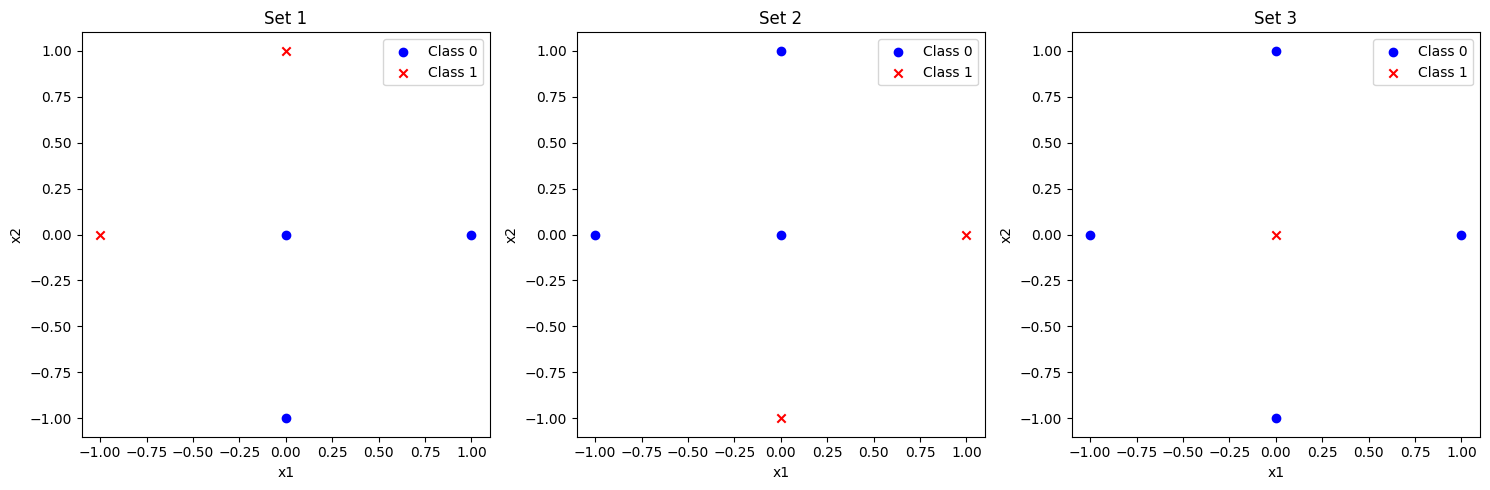

In [12]:
import numpy as np
import matplotlib.pyplot as plt


# Data for Set 1, Set 2, and Set 3
sets = {
    "Set 1": {
        "x1": [0, 1, 0, -1, 0],
        "x2": [0, 0, -1, 0, 1],
        "labels": [0, 0, 0, 1, 1]
    },
    "Set 2": {
        "x1": [0, 0, -1, 1, 0],
        "x2": [0, 1, 0, 0, -1],
        "labels": [0, 0, 0, 1, 1]
    },
    "Set 3": {
        "x1": [0, 1, 0, -1, 0],
        "x2": [0, 0, 1, 0, -1],
        "labels": [1, 0, 0, 0, 0]
    }
}

# Step 1: Plot the data
def plot_data():
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    for i, (set_name, data) in enumerate(sets.items()):
        x1, x2, labels = data["x1"], data["x2"], data["labels"]
        axs[i].scatter(
            [x for x, l in zip(x1, labels) if l == 0],
            [x for x, l in zip(x2, labels) if l == 0],
            label="Class 0",
            color="blue",
            marker="o"
        )
        axs[i].scatter(
            [x for x, l in zip(x1, labels) if l == 1],
            [x for x, l in zip(x2, labels) if l == 1],
            label="Class 1",
            color="red",
            marker="x"
        )
        axs[i].set_title(set_name)
        axs[i].set_xlabel("x1")
        axs[i].set_ylabel("x2")
        axs[i].legend()
    plt.tight_layout()
    plt.show()

plot_data()

#### What is the main difference between set 1, set 2 and set 3?

The main difference between the three sets, at least from our point of view, is that the points in set 1 and set 2 are linearly separable, while the two classes in set 3 are clearly not. Other differences are present, such as the data balancing (set 3 is more unbalanced) but the main difference is the linear separability.

**2. Compute the vectors β that allow to use (3) to classify the data contained in set 1 and set 2 assuming a
threshold ϵ = 0.5 for the positive class. Is the solution unique ? Motivate your answer.**

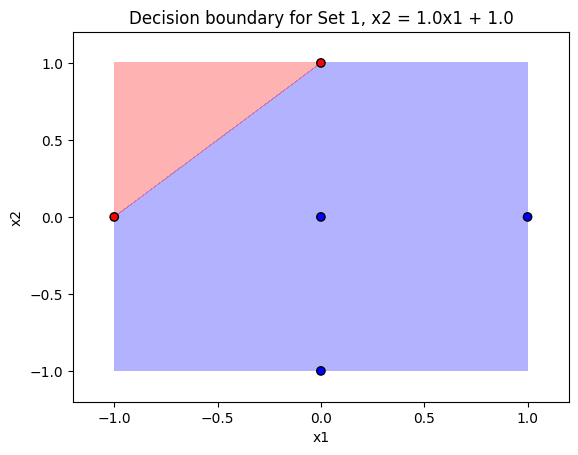

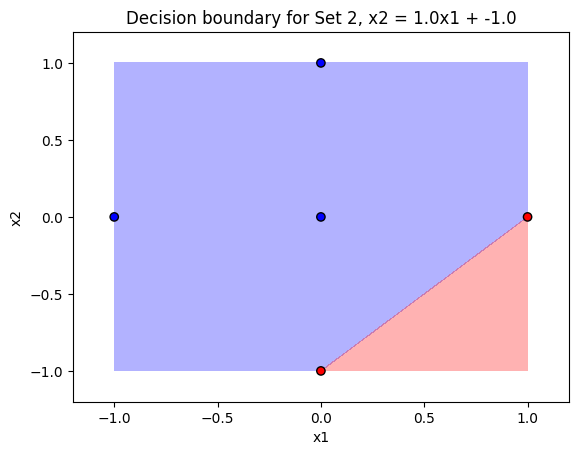

In [13]:
# Step 2: Compute beta for Set 1 and Set 2 using the perceptron learning algorithm
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(x1, x2, beta):
    return 1 if sigmoid(beta[0] + beta[1] * x1 + beta[2] * x2) >= 0.5 else -1

def perceptron_learning_algorithm(x1, x2, labels, eta, n_iter):
    labels = (np.array(labels) * 2) - 1 # set labels to -1, 1
    # Initialize beta
    beta = np.zeros(3)
    # Add a column of ones to the data matrix
    X = np.array([np.ones(len(x1)), x1, x2]).T
    # Run the perceptron learning algorithm
    for _ in range(n_iter):
        for i in range(len(X)):
            y_pred = predict(x1[i], x2[i], beta)
            beta += eta * (labels[i] - y_pred) * np.array([1, x1[i], x2[i]])
    return beta

beta1 = perceptron_learning_algorithm(sets["Set 1"]["x1"], sets["Set 1"]["x2"], sets["Set 1"]["labels"], 0.01, 1000)

beta2 = perceptron_learning_algorithm(sets["Set 2"]["x1"], sets["Set 2"]["x2"], sets["Set 2"]["labels"], 0.01, 1000)

# Step 3: Plot the decision boundary for Set 1 and Set 2
def plot_decision_boundary(beta, set_name):
    x1 = np.linspace(-1, 1, 100)
    x2 = np.linspace(-1, 1, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Y = sigmoid(beta[0] + beta[1] * X1 + beta[2] * X2)
    plt.contourf(X1, X2, Y, levels=[0, 0.5, 1], colors=['blue', 'red'], alpha=0.3)
    
    # Plot the data points
    data = sets[set_name]
    plt.scatter(data["x1"], data["x2"], c=data["labels"], cmap='bwr', edgecolors='k')
    
    plt.title(f"Decision boundary for {set_name}, x2 = {-beta[1]/beta[2]}x1 + {-beta[0]/beta[2]}")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.xlim(-1.2, 1.2)
    plt.ylim(-1.2, 1.2)
    plt.show()

plot_decision_boundary(beta1, "Set 1")
plot_decision_boundary(beta2, "Set 2")

#### Is the solution unique? Motivate your answer.

The solution is clearly not unique, a proper vertical shift in the decision boundary would still perfecrtly classify the two sets.

In particular lowering -beta1[0]/beta1[2] or increaing -beta2[0]/beta2[2] values up to a a value of 1 (1 excluded) would still classify the two sets correctly.

Note: I have assumed that on the decision boundary we assign label 1 to the points exactly on the boundary.

**3. Consider the following alternative system of coordinate (ξ1 , ξ2 ) to define the data contained in set 3
   Explain how we can use ξ1 and ξ2 to classify the data contained in set 3.**





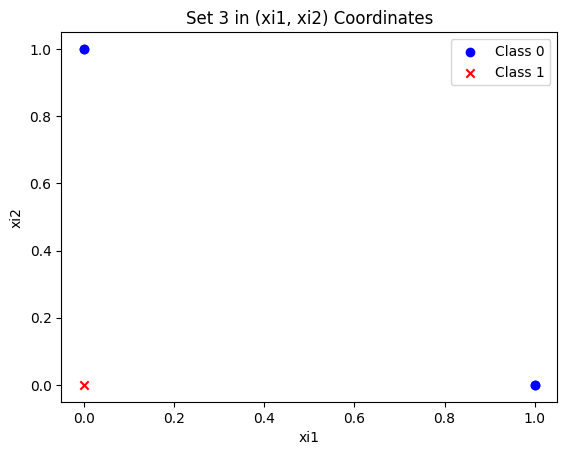

In [14]:

# Alternative coordinates for Set 3
xi1 = [0, 0, 0, 1, 1]  
xi2 = [0, 1, 1, 0, 0]  
labels_set3 = sets["Set 3"]["labels"] # same as before

# Plot the data in the new coordinates to visualize the linear separability
plt.scatter([x for x, l in zip(xi1, labels_set3) if l == 0],
            [x for x, l in zip(xi2, labels_set3) if l == 0],
            label="Class 0",
            color="blue",
            marker="o")
plt.scatter([x for x, l in zip(xi1, labels_set3) if l == 1],
            [x for x, l in zip(xi2, labels_set3) if l == 1],
            label="Class 1",
            color="red",
            marker="x")
plt.title("Set 3 in (xi1, xi2) Coordinates")
plt.xlabel("xi1")
plt.ylabel("xi2")
plt.legend()
plt.show()


#### Explain how we can use ξ1 and ξ2 to classify the data contained in set 3.

In this coordinate system the dimension ξ1 and ξ2 are such that set 3 is linearly separable. So if we can reduce the input data to this new coordinate system we can use a final single perceptron implemented via logistic regression to classify the data.


**4. Propose a neural network to determine the parameters to be used to classify set 3.**

The network should more than one layer to be able to classify the data contained in set 3. A possible network is a two layer network with a single hidden layer with 2 neurons and a single output neuron. 
The input layer has 2 neurons, one for each dimension of the input data.

Exploiting the fact that data is linearly separable in ξ1, ξ2 we can find a first layer that maps the input data into the new coordinate system. The output layer then can classify the data in the new coordinate system.
So we have (next cell) where we combine a the three neurnons to get the result (so firs layer map to e1 e2, than the output layer maps e1 and e2 to the labels of set 3).

In [15]:
# set epsilon 1
x1_set3 = [0,1,0,-1,0]
x2_set3 = [0,0,1,0,-1]

labels_e1 = [0,0,0,1,1]
labels_e2 = [0,1,1,0,0]


beta_e1 = perceptron_learning_algorithm(x1_set3, x2_set3, labels_e1, 0.01, 1000)
beta_e2 = perceptron_learning_algorithm(x1_set3, x2_set3, labels_e2, 0.01, 1000)

out_1 = [(predict(x1, x2, beta_e1) + 1)/2 for x1, x2 in zip(x1_set3, x2_set3)]
out_2 = [(predict(x1, x2, beta_e2) + 1)/2 for x1, x2 in zip(x1_set3, x2_set3)]

print(f"Output for epsilon 1: {out_1}")
print(f"Output for epsilon 2: {out_2}")


beta3 = perceptron_learning_algorithm(xi1, xi2, labels_set3, 0.01, 1000)

out_3 = [(predict(x1, x2, beta3) + 1)/2 for x1, x2 in zip(xi1, xi2)]
print(f"Output for Set 3: {out_3}")


# combining all together

def nn(x1, x2, beta1, beta2, beta3):
	out1 = (predict(x1, x2, beta1)+1) /2
	out2 = (predict(x1, x2, beta2)+1)/2
	print(f"out1 = {out1}, out2 = {out2}")
	return (predict(out1, out2, beta3)+1)/2

out_all = [nn(x1, x2, beta_e1, beta_e2, beta3) for x1, x2 in zip(x1_set3, x2_set3)]
print(f"Output for all: {out_all}")

Output for epsilon 1: [0.0, 0.0, 0.0, 1.0, 1.0]
Output for epsilon 2: [0.0, 1.0, 1.0, 0.0, 0.0]
Output for Set 3: [1.0, 0.0, 0.0, 0.0, 0.0]
out1 = 0.0, out2 = 0.0
out1 = 0.0, out2 = 1.0
out1 = 0.0, out2 = 1.0
out1 = 1.0, out2 = 0.0
out1 = 1.0, out2 = 0.0
Output for all: [1.0, 0.0, 0.0, 0.0, 0.0]
